<center><h2><b>CIC-Darknet2020</b></h2></center>
<center><h2><b>Analysis</b></h2></center>

# Libraries importing and configuration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
dataset_folder = "dataset/" 
img_folder = "imgs/"

plt.rcParams['figure.figsize'] = (18,6)
plt.rcParams["savefig.format"] = 'pdf'
plt.rcParams["savefig.dpi"] = 600
plt.rcParams.update({'font.size': 22})
if not os.path.exists('imgs'):
    os.makedirs('imgs')

In [4]:
samples = pd.read_csv(dataset_folder + 'darknet_dataset_processed.csv')

# Traffic origin

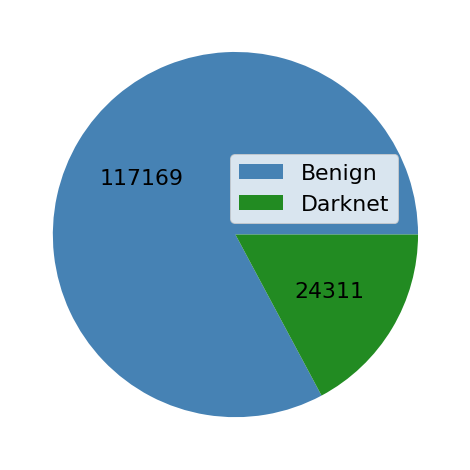

In [5]:
df = samples.groupby("Label").count()
fig, ax = plt.subplots(figsize=(7,7))
df.head()
plt.pie(df["Flow ID"], shadow=False,
         autopct=lambda x: int(df["Label.1"].values.sum()*x/100), colors=["#4682B4","#228B22"])
plt.legend(["Benign", "Darknet"], bbox_to_anchor=(0.43,0.3,0.45,0.4),framealpha=0.8)
plt.tight_layout()
plt.savefig(img_folder+'distr_dados_ref')
plt.show()

## Labels probability distribution

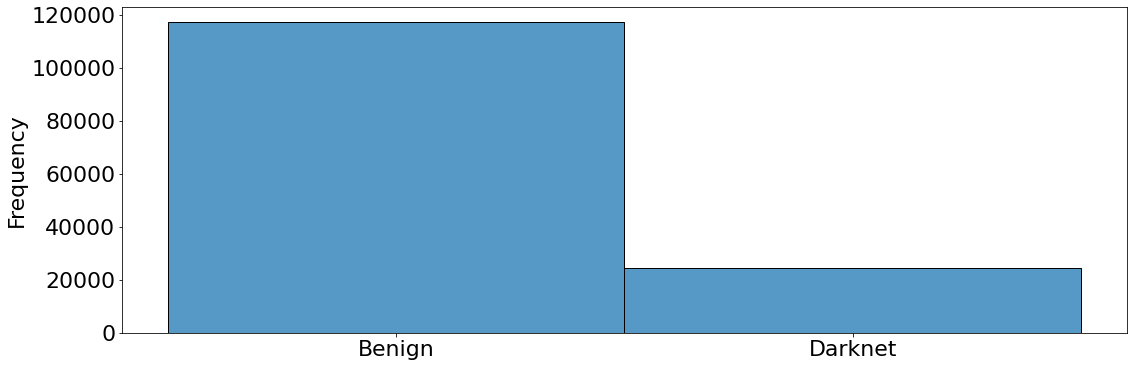

In [6]:
sns.histplot(data=samples, x="Label", stat="frequency")
plt.xlabel('')
plt.show()

## Access hour

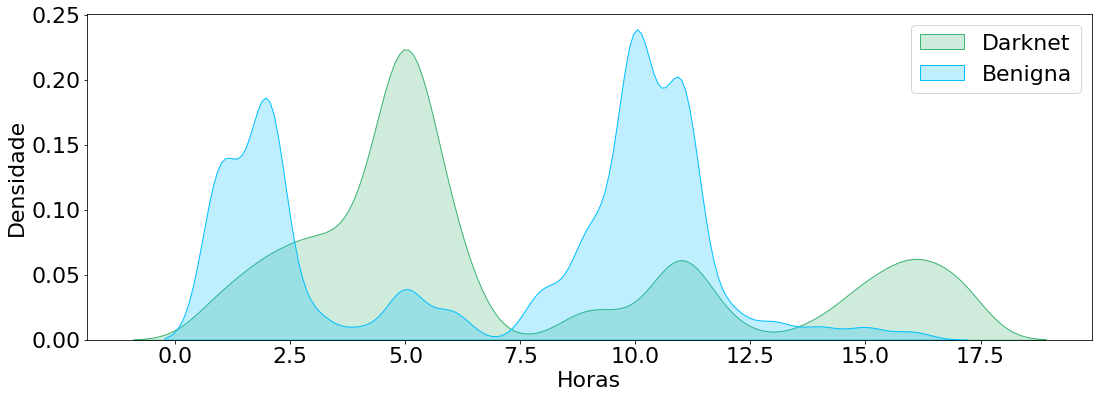

In [7]:
plot_graph_darknet = samples[samples['Label'] == "Darknet"]
plot_graph_benign = samples[samples['Label'] == "Benign"]
sns.kdeplot(plot_graph_darknet['hour'], shade=True, color="#3CB371")
sns.kdeplot(plot_graph_benign['hour'], shade=True, color="#00BFFF")
plt.xlabel("Horas")
plt.ylabel("Densidade")
plt.legend(['Darknet', 'Benigna'])
plt.savefig(img_folder + 'hour_relationship2')
plt.show()

# Traffic characterization

## Type of traffic on Darknet

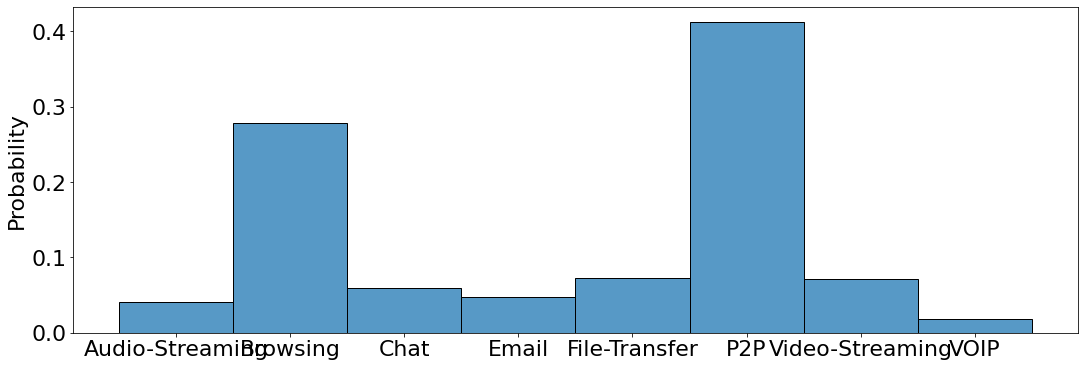

In [8]:
sns.histplot(data=samples[samples['Label'] == "Benign"], x="Label.1", stat="probability")
plt.xlabel('')
plt.show()

## Type of traffic outside the Darknet

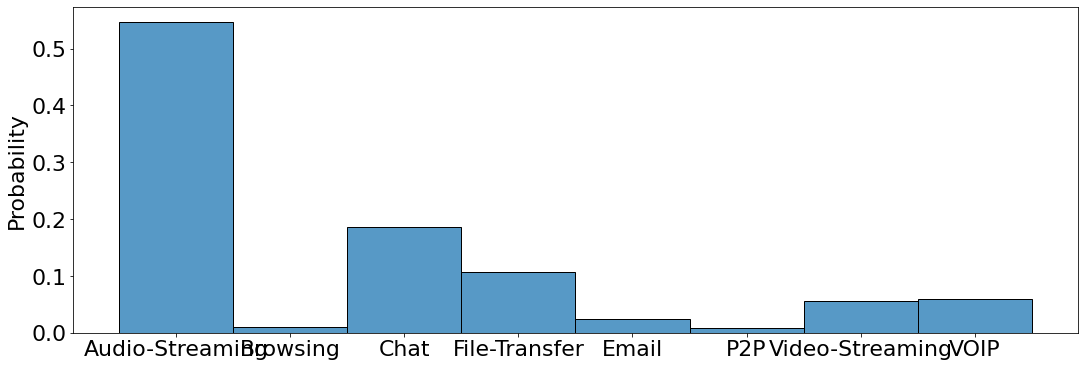

In [9]:
sns.histplot(data=samples[samples['Label'] == "Darknet"], x="Label.1", stat="probability")
plt.xlabel('')
plt.show()

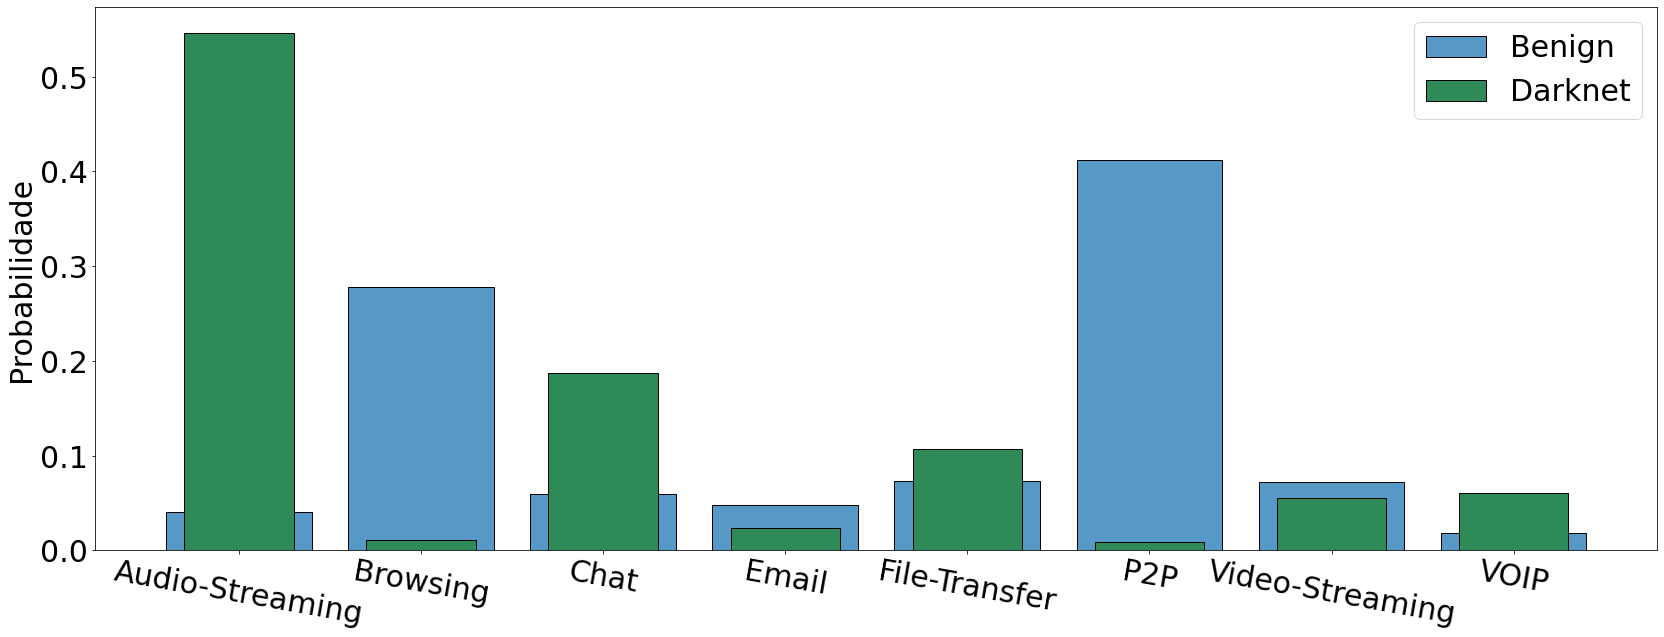

In [60]:
plt.rcParams.update({'font.size': 30})

plt.figure(figsize=(28,10))
sns.histplot(data=samples[samples['Label'] == "Benign"], x="Label.1", stat="probability",shrink=0.8 ,label="Benign")
sns.histplot(data=samples[samples['Label'] == "Darknet"], x="Label.1", stat="probability",shrink=0.6, label="Darknet", alpha=1,color="#2E8B57")
plt.xlabel("")
plt.ylabel("Probabilidade")
plt.legend()
plt.xticks(rotation=-10)
plt.savefig('relacao_aplicacao_trafego.pdf')
plt.show()